필요한 내용 메모및 , 코드 작업 진행하기.
1) 기술 통계 / 회귀 분석 / 상관 분석을 작업하고, 
2) 히스토그램 , 파이차트, 산점도 , 히트맵 등으로 시각화 해보기. 

# 와인 품질 등급 예측하기 
## 와인 속성을 분석해서 품질 등급 예측. 

### 데이터 수집, 레드와인, 화이트와인, 머신 러닝 저장소 레포지토리 사이트 , 최근에 제가 확인 해보니. 
### 데이터가 not found , 그래서, 따로 다운로드를 받아서 제공하기. 

### 탐색 , 정보확인 info() 함수를 이용 예정, 

### 기술 통계 확인, describe() : 기본 평균, 분산, 편차, 최소,최대등 통계관련 데이터 간단히 요약
### unique() : 중복제거, value_counts() : 해당 데이터의 갯수를 집계 

## 데이터 모델링 
### 1) 데이터 두 그룹으로 비교 분석, 
### 2) t-검정, 두 그룹을 비교하는 분석, 라이브러리를 이용할 예정. scipy 패키지의 ttest_ind()
### 3) 회귀분석, 라이브러리  statsmodels.formula.api , ols()

### 등급 예측 
### 샘플을 독립변수 (x) -> 회귀분석 모델 적용 -> 종속 변수(y) -> 품질 예측. 

#수업메모 #빅데이터분석_시각화
231218 

준비물 : vscode , 파이썬(현재 버전 3.12.0 으로 사용중)
쥬피터 노트북을 이용해서 코드 실행할 예정. 

필요시, 파이썬 다운그레이드 -> 3.10.0 , 한글 워드 클라우드 (형태소 분석 라이브러리의 버전 종속성 문제)
특정 scikit learn 패키지의 내부 데이터 셋이 변경된 부분이 있어서, 이것도 
필요시, 다운그레이드 할 예정. 

수업은 가급적 타이핑, 라이브 코드 진행함. 

시각화(기술통계, 분석 조금씩 내포되어 있음. )-------------------------------------------------------------
1. 와인에 관련된 , 품질 분석, 히스토그램 - 산점도 시각화
2. 타이타닉호에 생존자에 관련된 분석. 히트맵 시각화
3. 영어/한글 빈도수에 대해서 분석, 워드 클라우드 시각화
4. 우리나라 행정 시,군,구 주소를 -> 위도, 경도로 변환 및 , 블록맵 시각화 등. 

---------------------------------------------------------
분석, 
1) 회귀분석 
2) 선형 휘귀분석
파이토치 라이브러리 활용할 예정. 
3) 지도 학습 
4) 비지도 학습 
-------------------------------------------------------------------

작업할 연습장 폴더 만들기. 

# 용어정리
## 기술 통계 : 데이터 특성을 나타내는 수치를 이용해 분석을 하는 기본적인 통계 방법, 요약통계라고도 함  , 통계값으로 평균, 중앙값, 최빈값 등. 대표적으로 표준편차, 사분위 값, 

## 회귀 분석 : 독립 변수 x , 종속 변수 y 간의 서로 간의 연관성을 파악하기 위한 분석기법. 
## 하나의 변수가 다른 변수에 어떤한 영향을 주냐, 인과관계를 분석시 많이 사용함. 
## 선형 회귀 (직선을 이용한다. )
## 수식 => y = b1 + b2x + b3x + .....+ bnx

## t-검정 : 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인 하는 방법. 
## 예) red 와인, white 와인의 1등급, 2등급인지 유무에 따라 가격의 차이가 있는지 확인시 사용.



In [130]:
# 데이터 준비, 
# 파일 정리 간단히 하기. 
# 초기 데이터 세미콜론으로 구분이 되어 있어서, -> csv 파일로 변경해보기. 
# 만약, pandas 미설치 이면
# 쥬피터 노트북 코드로 설치시
# !pip install pandas 
# cmd 터미널 설치시 -> pip install pandas 
import pandas as pd 
# 레드와인을 csv 파일로 읽어서 -> 메모리 이동 -> csv 파일로 변경하기. 
# header = 0 , csv 파일의 첫번째 행에 열이름 포함. 데이터 프레임 1행에 컬럼명으로 사용한다.
# engine = 'python' , 보통은 C 엔진을 사용하지만, 경우에 따라서, 또는 파싱의 형태의 
# 따라서, 파이썬 엔진을 사용하기도 함. 
red_df = pd.read_csv("./winequality-red.csv",
sep=";", header = 0, engine = 'python')

# csv 파일 형식으로 옮기기 
# index=False ,데이터프레임(DF로 표현 중) 행의 레이블을 csv에 쓰지 않음.
# DataFrame의 인덱스(행 번호)가 파일에 함께 저장되지 않습니다
red_df.to_csv("./winequality-red2.csv",
index=False)

In [131]:
# 화이트와인을 csv 파일로 읽어서 -> 메모리 이동 -> csv 파일로 변경하기. 
white_df = pd.read_csv("./winequality-white.csv",
sep=";", header = 0, engine = 'python')

# csv 파일 형식으로 옮기기 
# white_df.to_csv("C:/BigDataTest/My_Python/1-통계분석/winequality-white2.csv",
# index=False)
white_df.to_csv("./winequality-white2.csv",
index=False)

In [132]:
# 이미 머신러닝 연구소에 데이터를 관리를 하다보니, 미리 전처리가 되어 있음.
# 작업 중에 간혹, 널 값이라든지, 값이 크다든지 이상치, 이런 부분은 나중에 
# 파이썬의 함수를 이용해서, 값 변경하는 부분 보여 줄 예정. 

# 데이터 구조 보기.

fixed acidity, (고정산)
volatile acidity,( 휘발산)
citric acid,(구연산)
residual sugar,(잔당)
chlorides,(염화물)
free sulfur dioxide,(유리 이산화황)
total sulfur dioxide,(총 이산화황)
density,(밀도)
pH,
sulphates,(황산염)
alcohol,(알코올)
위에 변수 :
독립 변수
======================
종속변수
quality, (품질)
=========================
데이터 전처리가 다 되어 있고, 
나열 할 때, 
독립 변수 순서  다음으로 종속 변수를 마지막에 표기한다. 

In [133]:
# 레드 와인, 화이트 와인의 샘플 데이터
# head() 상위 5개씩 추출해서 출력해보기. 
# 레드 와인, 
red_df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [134]:
# 화이트 와인, 
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [135]:
# 데이터 병합하기. 
# 레드 와인, 화이트 와인 합치기
# 레드 와인 csv 파일에 , 컬럼을 추가하기. 
# type 이라고, red , white 인지 분류를 위해서. 
# insert 특정 열 추가. 
red_df.insert(0, column="type", value="red")
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [136]:
# 이미 추가해서, 또 실행하면 또 추가하니, 일단 주석. 
# white_df.insert(0, column="type", value="white")
white_df.head()
# 각 행 열의 구조 
# white_df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [137]:
# 레드 , 화이트 와인 타입 열 추가 후 병합(합치기)
wine = pd.concat([red_df,white_df])

In [138]:
# 결과 조회 
wine.shape

(6497, 13)

In [139]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [140]:
# red, white 합친 메모리의 내용을 -> csv 파일로 쓰기. 
# csv 파일 형식으로 옮기기 
wine.to_csv("./wine.csv",
index=False)

In [141]:
# 합쳐진 데이터를 가지고 , 기본 통계 분석하기, 파이썬의 라이브러리 활용해보기. 
# 기본 정보 
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [142]:
# wine csv 파일의 헤더(컬럼 이름의 공백을 언더바로 교체 작업. )
wine.columns = wine.columns.str.replace(" ", "_")

In [143]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
#wine csv 의 간단한 설명
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [145]:
# wine csv의 해당 값의 카운트 
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [146]:
# wine 의 품질의 유니크 함수 이용해서unique() , 중복 제거 
# sorted 함수 이용해서 정렬. 
sorted(wine.quality.unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [147]:
# 데이터 모델링 
# describe() 함수를 이용해서 그룹 비교해보기. 
# 레드, 화이트 두 그룹으로 나눠서 비교 해보기. 
wine.groupby("type")["quality"].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0


In [148]:
# 특정의 통계 값 조회, 예 평균. 
wine.groupby("type")["quality"].mean()

type
red    5.636023
Name: quality, dtype: float64

In [149]:
# 평균, 표준편차, 최소값, 최대값 조회.
wine.groupby("type")["quality"].agg(["mean","std","min","max"])

,mean,std,min,max
type,,,,
red,5.636023,0.807569,3,8


In [150]:
# 기술 통계 = 요약 통계, 통계 값들을 가지고, 기본적인 분석 
# t-검정, 회귀분석 , -> 파이썬에 제공하는 함수를 이용할 예정. 
# t-검정 그룹 간의 차이를 확인 할 예정 -> scipy 패키지 이용 예정. 
# 회귀분석 -> statsmodels 라이브러리 사용할 예정. 
# pip install statsmodels

from scipy import stats
from statsmodels.formula.api import ols,glm 

red_wine_quality = wine.loc[wine['type'] == "red", "quality"]
print(red_wine_quality.head())
# red_wine_quality
white_wine_quality = wine.loc[wine['type'] == "white", "quality"]
print(white_wine_quality.head())

# t-검정 분석 하기.
# equal_var=False: 두 그룹의 분산이 동일하다는 가정을 하지 않습니다.
# 이 옵션을 사용하면 Welch의 t-검정(Welch’s t-test)이 수행되며,
# 이는 두 그룹의 분산이나 샘플 크기가 다를 때 더 안정적인 결과를 제공합니다
stats.ttest_ind(red_wine_quality,white_wine_quality, equal_var= False)

# 독립 변수와, 종속 변수의 , 나열 - "종속변수 ~ 독립변수1 + 독립변수2"
Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

# 위에서 정의한, 종속 변수(quality), 나머지 변수 독립 변수를 정리 
# 회귀 분석 함수 수행. 
# ols -> OLS(Ordinary Least Squares)
regression_result = ols(Rformula, data = wine).fit()

# 회귀 분석 요약을 출력. 
regression_result.summary()




0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
Series([], Name: quality, dtype: int64)


/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:36:43   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
# 만든 회귀 분석 모델을 활용해서, 예측 해보기. quality, type 2개의 열을 제외하기. 
sample1 = wine[wine.columns.difference(["quality","type"])]
# wine
# sample1
# sample1.shape
sample1_2 = sample1[0:5][:]
print(sample1_2.head())
# sample1_2
sample1_predict = regression_result.predict(sample1_2)
# 지도학습, 답이 있는 평가 분석 방법. 
print(f"sample1_predict 앞에 만든 회귀분석 모델을 이용해서 quality 예측값 \n :{sample1_predict}")
print(f"회귀 분석 하기전에 원래의 quality 값 확인 \n :{wine[0:5]['quality']}")


   alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076         0.00   0.9978            7.4   
1      9.8      0.098         0.00   0.9968            7.8   
2      9.8      0.092         0.04   0.9970            7.8   
3      9.8      0.075         0.56   0.9980           11.2   
4      9.4      0.076         0.00   0.9978            7.4   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 11.0  3.51             1.9       0.56                  34.0   
1                 25.0  3.20             2.6       0.68                  67.0   
2                 15.0  3.26             2.3       0.65                  54.0   
3                 17.0  3.16             1.9       0.58                  60.0   
4                 11.0  3.51             1.9       0.56                  34.0   

   volatile_acidity  
0              0.70  
1              0.88  
2              0.76  
3              0.28  
4              0.70  
sample1_

In [152]:
# 자료의 있는 값이 아니라. 
# 임의로 우리가 독립 변수의 값을 설정해서, 모델을 이용해, 품질의 결과값 예측 해보기. 
# Rformula = "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol"

# 임의의 data 만들기, 독립 변수에 예시 값 넣어보고, 모델로 예측 다시 해보기. 
data = {"fixed_acidity":[8.2, 8], "volatile_acidity":[0.7,0.5],"citric_acid" : [0.2,0.3],
"residual_sugar":[6.0,5.7], "chlorides" : [0.045,0.040], "free_sulfur_dioxide" : [29.0,30.0], "total_sulfur_dioxide":[97.0,98.0],
"density" : [0.955, 0.92], "pH" :[3.12,3.01], "sulphates": [0.3,0.25], "alcohol":[8.9,8.8] }

# 딕션너리 -> pd 이용해서 표로 만들기(DataFrame=DF)
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.9,0.045,0.2,0.955,8.2,29.0,3.12,6.0,0.30,97.0,0.7
1,8.8,0.040,0.3,0.920,8.0,30.0,3.01,5.7,0.25,98.0,0.5


In [153]:
# 임의의 수치로 만든 data를 회귀모델에 인자값으로 넣어서, 결괏값 예측해보기. 
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    7.022545
1    9.066865
dtype: float64

In [154]:
# 분석 된 데이터를 가지고 , 결과 시각화 
# !pip install seaborn


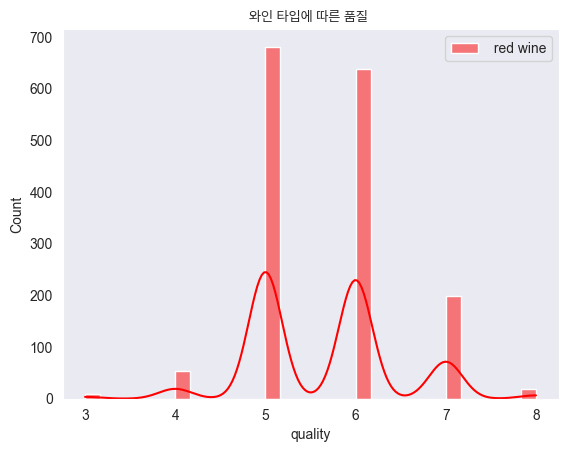

In [155]:
# 시각화에 필요한 패키지 임포트 하기.
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
# 폰트 경로 설정
font_path= "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

sns.set_style("dark")
# red wine 속성 설정.
# sns.distplot:
# 데이터의 분포(히스토그램)와 함께 커널 밀도 추정(kde)을 시각화하는 함수입니다.
# red_wine_quality:
# 빨간 와인의 품질 데이터를 담은 배열이나 시리즈입니다.
# kde=True:
# 히스토그램과 함께 부드러운 밀도 곡선(kde)을 그려, 데이터 분포의 연속적인 형태를 보여줍니다.
# color="red":
# 그래프의 색상을 빨간색으로 지정하여, red wine 데이터를 시각적으로 구분합니다.
# label=" red wine":
# 범례에 표시할 라벨로, 그래프에서 해당 데이터가 빨간 와인임을 나타냅니다.
sns.histplot(red_wine_quality, kde=True, color="red", label =" red wine")

# white wine 속성 설정.
sns.histplot(white_wine_quality, kde=True, color="blue", label =" white wine")

plt.title("와인 타입에 따른 품질 " ,fontproperties=font_prop)
plt.legend()
plt.show()

['density', 'citric_acid', 'alcohol', 'sulphates', 'volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'type', 'pH', 'chlorides']


ValueError: endog and exog matrices are different sizes

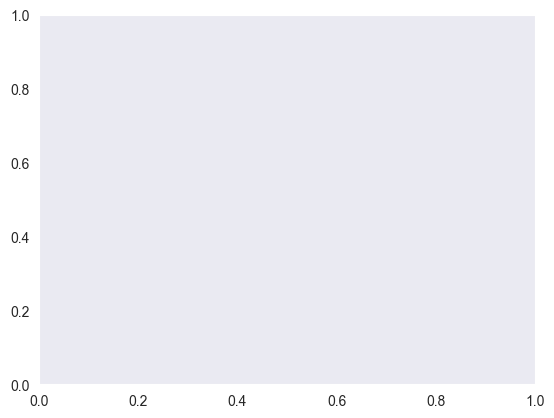

In [156]:
# 실제로 궁금했던 부분이, 어느 독립요소가, 실제 quality에 종속변수에 영향이 있는지 여부가 궁금했음. 
# 표에 답은 다 나와있었음 , 상관계수의 값으로 표기가 되었지만, 
# 시각화를 하는 이유가, 인사이트 결과를 좀더 쉽고 알아보기 편하게 하는게 주 목적. 

import statsmodels.api as sm 
# wine 컬럼들에서, 종속변수 quality, 독립변수 중 s하나인 fixed_acidity , 빼고 , 나머지를 필터
others = list(set(wine.columns).difference(set(["quality","fixed_acidity"])))
print(others)
# quality, fixed_acidity 두개의 상관 계수를 , 서로에게 영향이 있는지 여부이고, 
# 독립 변수 가 클수록 , 종속 변수 quality 가 ,증가 ?,. 감소? 확인, 수직선(상수, 관계없음. )
# 이 코드는 statsmodels 라이브러리의 그래픽 함수 중 하나인 plot_partregress를 사용하여,
# 회귀 분석에서 특정 독립 변수의 효과를 부분적으로(다른 변수들의 영향을 제거한 상태에서) 시각화하는 예제입니다.
#
# "quality": 종속 변수(예측하려는 변수)입니다.
# "fixed_acidity": 관심 있는 독립 변수로, 이 변수와 종속 변수 간의 관계를 살펴봅니다.
# others: "fixed_acidity" 외에 모델에 포함된 다른 독립 변수들의 이름을 담은 변수(리스트 등)로,
# 이 변수들의 영향을 제거한 후 "fixed_acidity"가 quality에 미치는 순수한 효과를 보여줍니다.

# data=wine: 데이터 소스(DataFrame)로, 와인 데이터셋을 사용합니다.
# ret_coords=True: 플롯을 그릴 때 사용한 좌표값들을 반환하도록 하여,
# 추후 추가적인 분석이나 커스터마이징에 활용할 수 있게 합니다.
# 즉, 이 함수는 "fixed_acidity"와 "quality" 사이의 관계를 다른 변수들의 효과를 통제한 상태에서 시각적으로 확인할 수 있도록 도와줍니다.
sm.graphics.plot_partregress("quality", "fixed_acidity", others, data=wine, ret_coords =True)
plt.show()
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

# 데이터 분포:
# 대부분의 점들이 중앙 부근에 몰려 있으나, x축 양 끝이나 y축 아래쪽 등에 소수의 점들이 분산되어 있습니다.
# 이들은 고정 산도나 품질에서 다른 변수로도 설명되지 않는
# 특별한 변동을 갖는 ‘이상값’ 혹은 ‘영향력이 큰 점’일 수 있습니다.

# 그래프에 보이는 숫자(예: 2781, 904, 4745 등)는
# 해당 데이터 포인트의 인덱스나 ID로, 통계적으로 눈에 띄는(잔차가 큰) 관측치를 식별하기 위해 표시됩니다.
#
# 요약
# 이 그래프는 고정 산도(fixed_acidity)와 와인 품질(quality)의 관계가
# 다른 독립 변수들로부터 영향을 제거한 상태에서도 약간의 양(+)의 상관관계가 있음을 보여줍니다.
# 즉, 고정 산도가 높아지면 품질도 소폭 상승하는 경향이 있다는 의미입니다.
# 다만, 데이터 분포가 세로 방향으로 크게 퍼져 있어 실제 품질에 영향을 미치는 다른 요인들도 많음을 짐작할 수 있으며,
# 일부 이상치나 영향력 있는 점들이 존재함을 확인할 수 있습니다.

# 결론, 
## 데이터 수집 : 데이터가 전처리가 다 되어 있다. 
## 독립변수 x1, x2, x3, ....., xn, y(종속변수), 이 컬럼의 순서대로 데이터가 전처리가 되어 있음. 

## 데이터 정리 : cleaning , null, 이상치, 결측치, 등 값의 유무등. 

## 데이터 분석 : t-검정, 선형회귀(파이썬의 함수를 이용했음. ), 답이 있는 내용을 가지고, 모델을 학습을 하고, 예측.

## 데이터 시각화 : 히스토그램, 산점도 등으로 시각화 했음. 

## 시각화를 통해서 : 얻고 싶은 결과가 뭐냐, 와인의 품질은 알코올의 영향을 많이 받는다, 정량적으로 분석. 도출. 

### 상관 분석, 기술 통계, 요약 통계 , 가장 기본적인 분석의 뼈대. 


